In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import joblib

In [2]:
Crema_Path='./data/Crema'
Ravdess_Path='./data/Ravdess/audio_speech_actors_01-24'
Savee_Path='./data/Savee'
Tess_Path='./data/Tess'

In [3]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                         File_Path
0  disgust  ./data/Crema/1041_IWW_DIS_XX.wav
1  disgust  ./data/Crema/1026_IEO_DIS_LO.wav
2     fear  ./data/Crema/1048_TAI_FEA_XX.wav
3      sad  ./data/Crema/1038_IEO_SAD_HI.wav
4  neutral  ./data/Crema/1027_ITS_NEU_XX.wav

In [4]:
Crema_df['Emotion'].unique()

array(['disgust', 'fear', 'sad', 'neutral', 'happy', 'angry'],
      dtype=object)

In [5]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0   happy  ./data/Ravdess/audio_speech_actors_01-24/Actor...
1    fear  ./data/Ravdess/audio_speech_actors_01-24/Actor...
2   happy  ./data/Ravdess/audio_speech_actors_01-24/Actor...
3   happy  ./data/Ravdess/audio_speech_actors_01-24/Actor...
4   angry  ./data/Ravdess/audio_speech_actors_01-24/Actor...

In [6]:
Ravdess_df['Emotion'].unique()

array(['happy', 'fear', 'angry', 'sad', 'neutral', 'disgust', 'surprise'],
      dtype=object)

In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                File_Path
0    happy  ./data/Savee/JK_h04.wav
1    happy  ./data/Savee/JK_h14.wav
2  neutral  ./data/Savee/JE_n05.wav
3  disgust  ./data/Savee/KL_d03.wav
4  disgust  ./data/Savee/JE_d12.wav

In [8]:
Savee_df['Emotion'].unique()

array(['happy', 'neutral', 'disgust', 'angry', 'sad', 'fear', 'surprise'],
      dtype=object)

In [9]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                 File_Path
0    fear    ./data/Tess/OAF_Fear/OAF_long_fear.wav
1    fear   ./data/Tess/OAF_Fear/OAF_pearl_fear.wav
2    fear  ./data/Tess/OAF_Fear/OAF_should_fear.wav
3    fear    ./data/Tess/OAF_Fear/OAF_love_fear.wav
4    fear    ./data/Tess/OAF_Fear/OAF_bean_fear.wav

In [10]:
Tess_df['Emotion'].unique()

array(['fear', 'happy', 'sad', 'neutral', 'angry', 'disgust', 'surprise'],
      dtype=object)

In [11]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [12]:
main_df.head(15)

Emotion                         File_Path
0   disgust  ./data/Crema/1041_IWW_DIS_XX.wav
1   disgust  ./data/Crema/1026_IEO_DIS_LO.wav
2      fear  ./data/Crema/1048_TAI_FEA_XX.wav
3       sad  ./data/Crema/1038_IEO_SAD_HI.wav
4   neutral  ./data/Crema/1027_ITS_NEU_XX.wav
5     happy  ./data/Crema/1090_IEO_HAP_HI.wav
6   disgust  ./data/Crema/1071_TSI_DIS_XX.wav
7       sad  ./data/Crema/1087_IWW_SAD_XX.wav
8       sad  ./data/Crema/1065_ITH_SAD_XX.wav
9   disgust  ./data/Crema/1081_IOM_DIS_XX.wav
10      sad  ./data/Crema/1083_ITH_SAD_XX.wav
11      sad  ./data/Crema/1077_TAI_SAD_XX.wav
12    happy  ./data/Crema/1031_ITS_HAP_XX.wav
13     fear  ./data/Crema/1091_IWL_FEA_XX.wav
14    happy  ./data/Crema/1059_WSI_HAP_XX.wav

In [13]:
main_df.tail(15)

Emotion                                          File_Path
2785  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_judge_p...
2786  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_tough_p...
2787  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_ton_ps.wav
2788  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_dog_ps.wav
2789  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_yes_ps.wav
2790  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_bought_...
2791  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_long_ps...
2792  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_pass_ps...
2793  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_lot_ps.wav
2794  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_pick_ps...
2795  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_pearl_p...
2796  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_numb_ps...
2797  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_half_ps...
2798  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_wife_ps...
2799  surprise  ./data/Tess/YAF_pleasant_surprised/YAF_beg_ps.wav

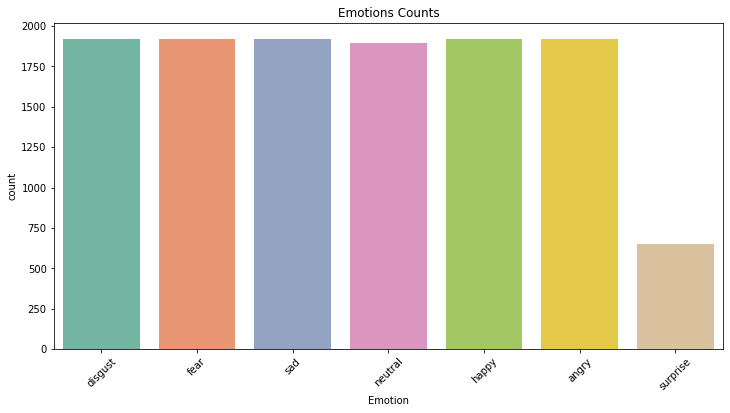

In [14]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [15]:
emotion_names=main_df['Emotion'].unique()

In [16]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [17]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [18]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

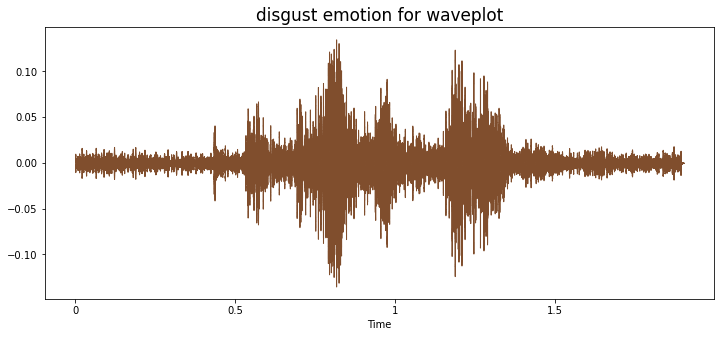

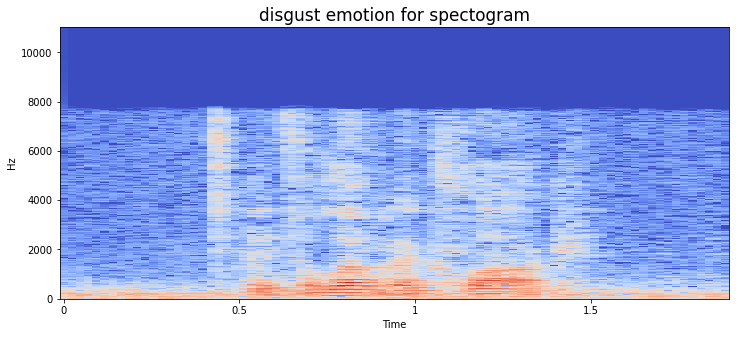

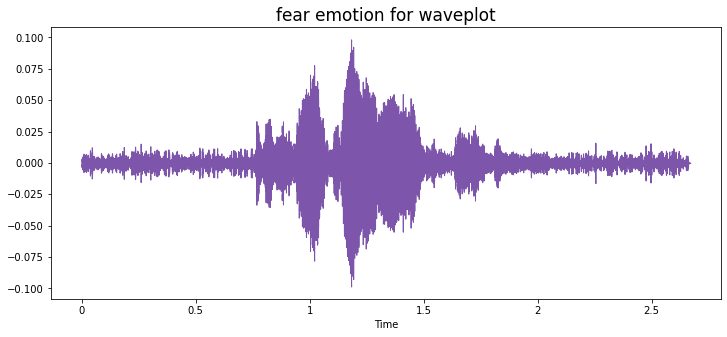

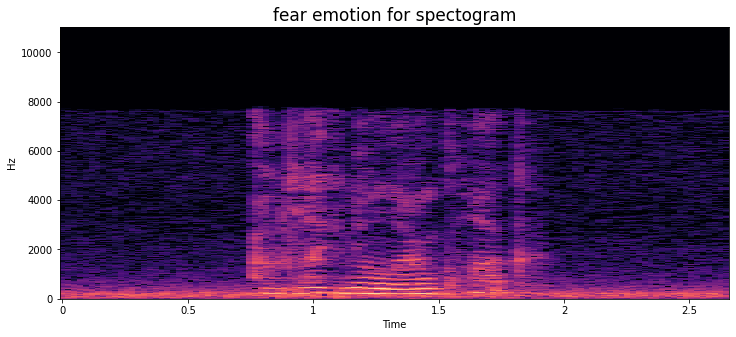

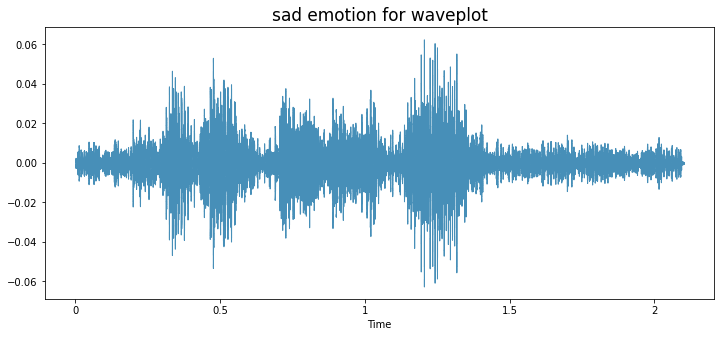

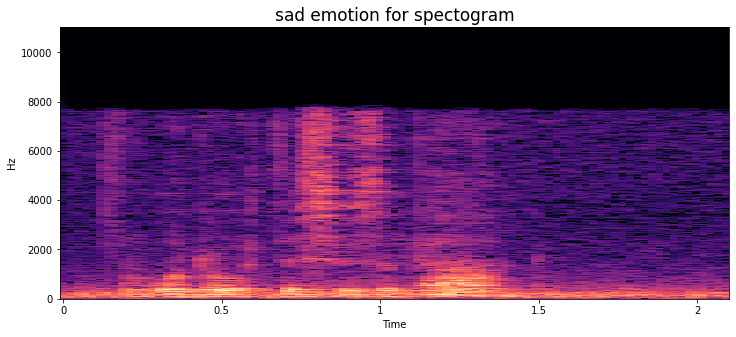

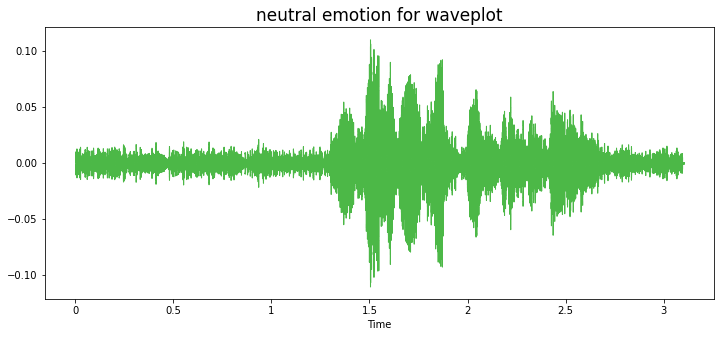

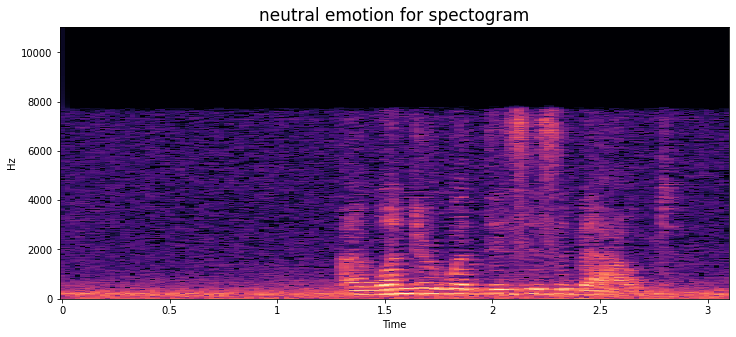

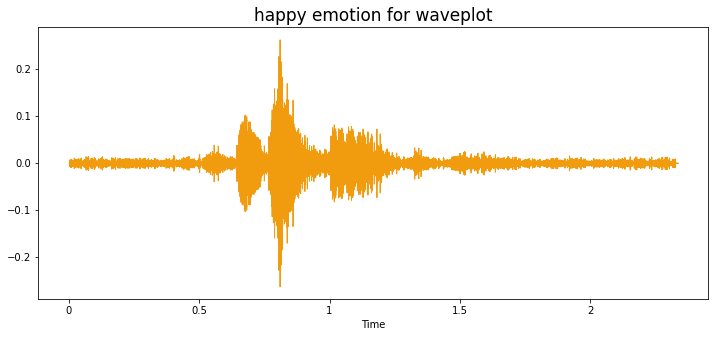

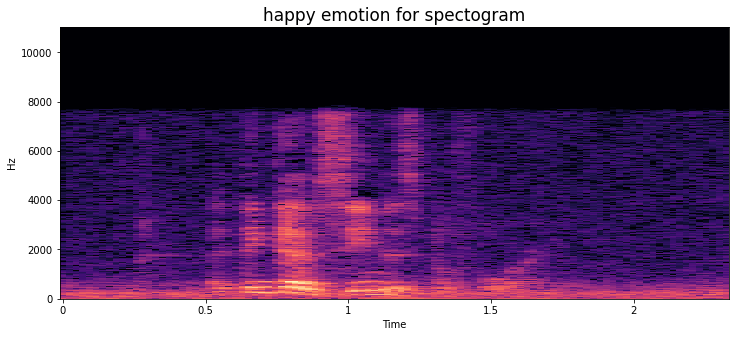

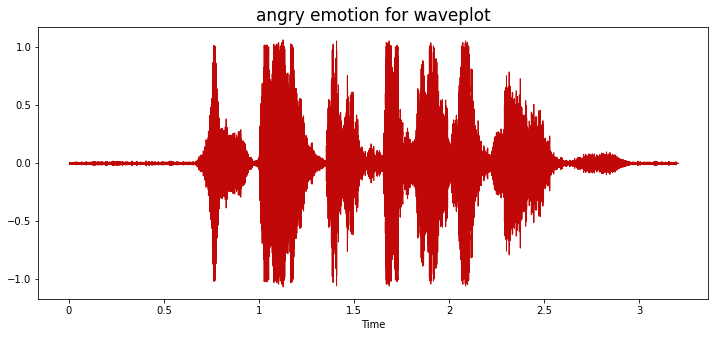

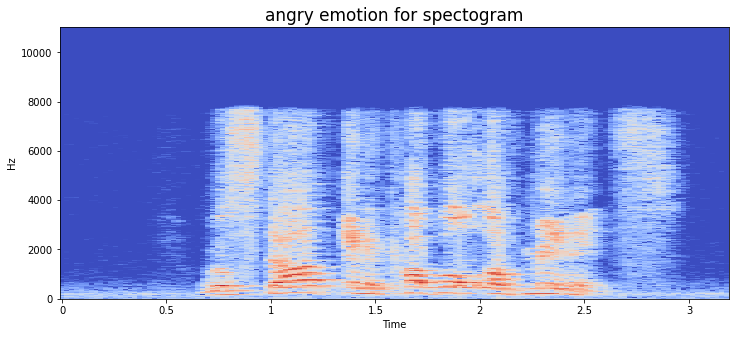

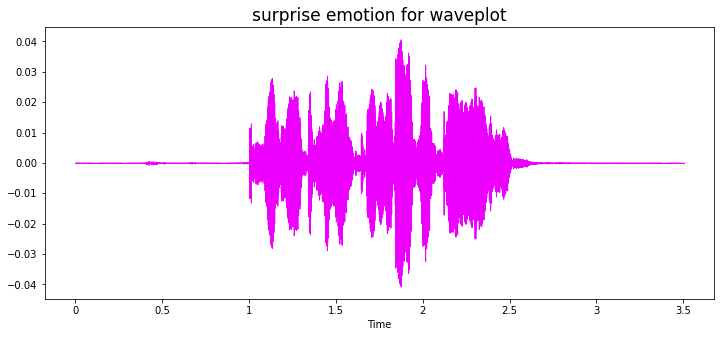

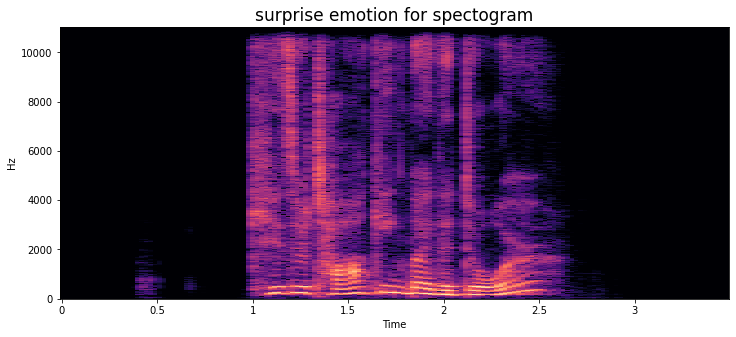

In [19]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)


In [22]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [23]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [24]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [25]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [26]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [27]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [28]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



In [20]:
data,sr=librosa.load(audio_path[6])

In [21]:
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse_features = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_features)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_features = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_features.T) if not flatten else np.ravel(mfcc_features.T)

def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                       ))
    return result

In [22]:
X, Y = [], []
for path, emotion, index in zip(main_df.File_Path, main_df.Emotion, range(main_df.File_Path.shape[0])):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    aud = extract_features(data, sr)
    X.append(aud)
    Y.append(emotion)
    if index % 500 == 0:
        print(f'{index} audio has been processed')

print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [23]:
len(X[0])

2288

In [24]:
len(X)

12162

In [25]:
processed_data_path='./processed_data.csv'

In [26]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

0         1         2         3         4         5         6  \
0  0.020020  0.033691  0.044434  0.046387  0.044434  0.043457  0.046875   
1  0.034180  0.063965  0.072754  0.076660  0.060059  0.041992  0.048828   
2  0.017578  0.024414  0.037109  0.039062  0.041016  0.037598  0.033203   
3  0.025391  0.034668  0.039062  0.041504  0.080566  0.165527  0.251465   
4  0.025879  0.049316  0.096191  0.170898  0.250488  0.294434  0.278320   
5  0.155273  0.162598  0.169434  0.051758  0.032227  0.032715  0.038086   
6  0.133789  0.227051  0.348145  0.411621  0.430176  0.452637  0.413574   
7  0.014160  0.022461  0.052734  0.051270  0.053223  0.062012  0.077148   
8  0.019043  0.025391  0.035156  0.038086  0.034180  0.038086  0.038574   
9  0.034180  0.053711  0.067383  0.063965  0.056152  0.043945  0.039062   

          7         8         9  ...  2367  2368  2369  2370  2371  2372  \
0  0.045898  0.050781  0.045898  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1  0.051758  0.056152  0.059570  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2  0.036133  0.036133  0.046387  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3  0.332520  0.377930  0.330078  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4  0.196777  0.111328  0.050781  ...   NaN   NaN   NaN   NaN   NaN   NaN   
5  0.041016  0.046875  0.052246  ...   NaN   NaN   NaN   NaN   NaN   NaN   
6  0.321777  0.223633  0.119141  ...   NaN   NaN   NaN   NaN   NaN   NaN   
7  0.131348  0.200195  0.236816  ...   NaN   NaN   NaN   NaN   NaN   NaN   
8  0.041992  0.046875  0.050781  ...   NaN   NaN   NaN   NaN   NaN   NaN   
9  0.039551  0.041992  0.051758  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2373  2374  2375  Emotion  
0   NaN   NaN   NaN  disgust  
1   NaN   NaN   NaN  disgust  
2   NaN   NaN   NaN     fear  
3   NaN   NaN   NaN      sad  
4   NaN   NaN   NaN  neutral  
5   NaN   NaN   NaN    happy  
6   NaN   NaN   NaN  disgust  
7   NaN   NaN   NaN      sad  
8   NaN   NaN   NaN      sad  
9   NaN   NaN   NaN  disgust  

[10 rows x 2377 columns]

In [27]:
df=pd.read_csv(processed_data_path)
df.shape

(12162, 2377)

In [28]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(12162, 2377)

In [29]:
df.head(10)

0         1         2         3         4         5         6  \
0  0.020020  0.033691  0.044434  0.046387  0.044434  0.043457  0.046875   
1  0.034180  0.063965  0.072754  0.076660  0.060059  0.041992  0.048828   
2  0.017578  0.024414  0.037109  0.039062  0.041016  0.037598  0.033203   
3  0.025391  0.034668  0.039062  0.041504  0.080566  0.165527  0.251465   
4  0.025879  0.049316  0.096191  0.170898  0.250488  0.294434  0.278320   
5  0.155273  0.162598  0.169434  0.051758  0.032227  0.032715  0.038086   
6  0.133789  0.227051  0.348145  0.411621  0.430176  0.452637  0.413574   
7  0.014160  0.022461  0.052734  0.051270  0.053223  0.062012  0.077148   
8  0.019043  0.025391  0.035156  0.038086  0.034180  0.038086  0.038574   
9  0.034180  0.053711  0.067383  0.063965  0.056152  0.043945  0.039062   

          7         8         9  ...  2367  2368  2369  2370  2371  2372  \
0  0.045898  0.050781  0.045898  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.051758  0.056152  0.059570  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.036133  0.036133  0.046387  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.332520  0.377930  0.330078  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.196777  0.111328  0.050781  ...   0.0   0.0   0.0   0.0   0.0   0.0   
5  0.041016  0.046875  0.052246  ...   0.0   0.0   0.0   0.0   0.0   0.0   
6  0.321777  0.223633  0.119141  ...   0.0   0.0   0.0   0.0   0.0   0.0   
7  0.131348  0.200195  0.236816  ...   0.0   0.0   0.0   0.0   0.0   0.0   
8  0.041992  0.046875  0.050781  ...   0.0   0.0   0.0   0.0   0.0   0.0   
9  0.039551  0.041992  0.051758  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   2373  2374  2375  Emotion  
0   0.0   0.0   0.0  disgust  
1   0.0   0.0   0.0  disgust  
2   0.0   0.0   0.0     fear  
3   0.0   0.0   0.0      sad  
4   0.0   0.0   0.0  neutral  
5   0.0   0.0   0.0    happy  
6   0.0   0.0   0.0  disgust  
7   0.0   0.0   0.0      sad  
8   0.0   0.0   0.0      sad  
9   0.0   0.0   0.0  disgust  

[10 rows x 2377 columns]

In [30]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [31]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9729, 2376), (2433, 2376), (9729, 7), (2433, 7))

In [33]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((8756, 2376), (2433, 2376), (973, 2376), (8756, 7), (2433, 7), (973, 7))

In [34]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((8756, 2376), (2433, 2376), (973, 2376), (8756, 7), (2433, 7), (973, 7))

In [35]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((8756, 2376, 1), (2433, 2376, 1), (973, 2376, 1))

In [36]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [37]:
EPOCH=14
BATCH_SIZE=64

In [38]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [39]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/14
137/137 [==============================] - 3820s 28s/step - loss: 1.6713 - accuracy: 0.3993 - val_loss: 5.2878 - val_accuracy: 0.1634 - lr: 0.0010
Epoch 2/14
137/137 [==============================] - 3941s 29s/step - loss: 1.3085 - accuracy: 0.4926 - val_loss: 3.5637 - val_accuracy: 0.1788 - lr: 0.0010
Epoch 3/14
137/137 [==============================] - 3845s 28s/step - loss: 1.1960 - accuracy: 0.5344 - val_loss: 3.0367 - val_accuracy: 0.2302 - lr: 0.0010
Epoch 4/14
137/137 [==============================] - 3809s 28s/step - loss: 1.1042 - accuracy: 0.5751 - val_loss: 1.6424 - val_accuracy: 0.3854 - lr: 0.0010
Epoch 5/14
137/137 [==============================] - 3902s 28s/step - loss: 1.0556 - accuracy: 0.5914 - val_loss: 1.3442 - val_accuracy: 0.5344 - lr: 0.0010
Epoch 6/14
137/137 [==============================] - 4276s 31s/step - loss: 0.9961 - accuracy: 0.6163 - val_loss: 1.3799 - val_accuracy: 0.5057 - lr: 0.0010
Epoch 7/14
137/137 [==============================] 

In [41]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

In [40]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

In [42]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred


77/77 [==============================] - 288s 4s/step


array([4, 0, 6, ..., 3, 1, 5])

In [43]:
y_check=np.argmax(y_test,axis=1)
y_check

array([4, 2, 5, ..., 0, 1, 5])

In [44]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Test Loss: 1.372692584991455
Test Accuracy: 0.5462391972541809


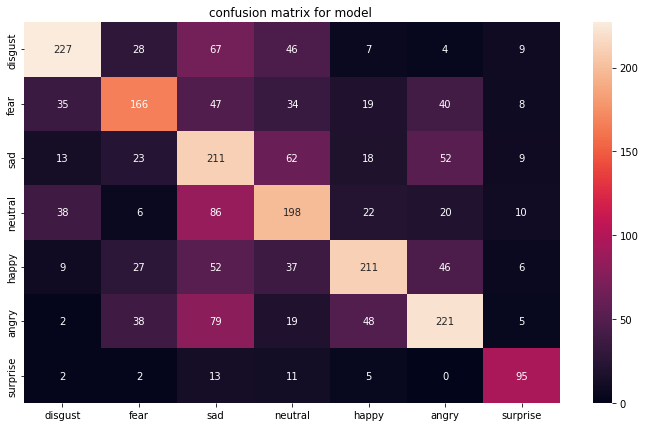

In [45]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [46]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     disgust       0.70      0.59      0.64       388
        fear       0.57      0.48      0.52       349
         sad       0.38      0.54      0.45       388
     neutral       0.49      0.52      0.50       380
       happy       0.64      0.54      0.59       388
       angry       0.58      0.54      0.56       412
    surprise       0.67      0.74      0.70       128

    accuracy                           0.55      2433
   macro avg       0.57      0.56      0.56      2433
weighted avg       0.56      0.55      0.55      2433



In [47]:
model_path = "./res_model.h5"

model.save(model_path)
